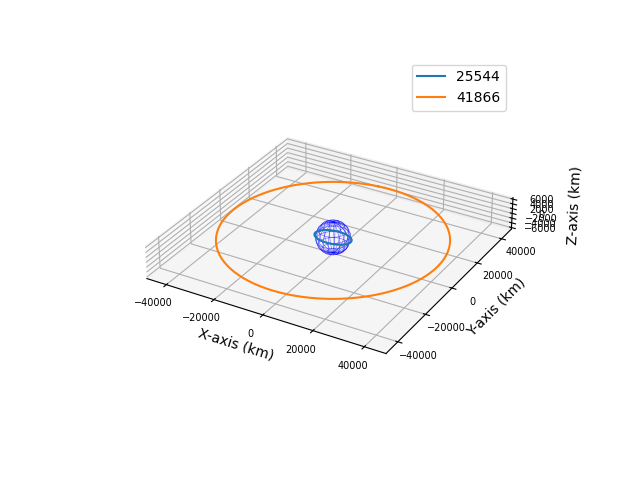

In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

from orbits import tle_parser


# Constants
mu = 398_600.4418  # Earth's gravitational parameter in km^3/s^2
r = 6_378.137  # Earth's radius in km


def validate_data(data):
    # TODO validate lines start with 1 & 2 otherwise throw an exception
    return True


def load_data(filename):
    with open(filename, "r") as f:
        data = f.readlines()
    if validate_data(data):
        return data


def plot_orbits(orbit_data):
    fig = plt.figure()
    ax = plt.axes(projection='3d', computed_zorder=False)

    for orbit in orbit_data:
        x, y, z = orbit.to_xyz()
        ax.plot(x, y, z, zorder=5, label=orbit.name)

    u, v = np.mgrid[0:2 * np.pi:20j, 0:np.pi:10j]
    ax.plot_wireframe(r * np.cos(u) * np.sin(v),
                      r * np.sin(u) * np.sin(v),
                      r * np.cos(v),
                      color="b", alpha=0.5, lw=0.5, zorder=0)
    ax.set_xlabel("X-axis (km)")
    ax.set_ylabel("Y-axis (km)")
    ax.set_zlabel("Z-axis (km)")
    ax.xaxis.set_tick_params(labelsize=7)
    ax.yaxis.set_tick_params(labelsize=7)
    ax.zaxis.set_tick_params(labelsize=7)
    ax.set_aspect('equal', adjustable='box')
    if len(orbit_data) // 2 < 5:
        ax.legend()
    else:
        fig.subplots_adjust(right=0.8)
        ax.legend(loc='center left', bbox_to_anchor=(1.07, 0.5), fontsize=7)
    ax.legend()
    plt.ion()
    plt.show()

tle_file = "/Users/jesse/Desktop/tle_iss_and_goes16.txt"
# tle_file = "/Users/jesse/Desktop/tle_goes16.txt"
orbits = tle_parser.parse_data(load_data(tle_file), mu)
plot_orbits(orbits)

# data = load_data(tle_file)

In [2]:
data

NameError: name 'data' is not defined